Деревья решений CART.
===============

Полезные ссылки.

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html<br>

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br>
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html<br>

http://scikit-learn.org/stable/modules/cross_validation.html<br>
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics<br>


## Деревья решений для задач классификации

In [1]:
#  Подключаю необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
#  Задаю рабочую папку
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_10_CART Trees")


In [3]:
#  Импортирую данные
#  df = pd.read_csv('Wine.txt', sep=';', encoding='cp1251')

df = pd.read_csv('Wine.txt', sep='\t')


In [4]:
#  Все хорошо?
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [5]:
#  Классы сбалансированы?
df['Desired1(3)'].value_counts()

2    71
0    59
1    48
Name: Desired1(3), dtype: int64

In [6]:
#  Проверяю размерность матрицы данных
df.shape

(178, 14)

In [7]:
#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values  

In [8]:
#  Стандартизация предикторов нужна?

In [8]:
#  разделяю на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)  


In [9]:
#  Задаю параметры модели
from sklearn.tree import DecisionTreeClassifier

# Инициализируем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               # максимальное число конечных узлов (сейчас - без ограничений)
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               # минимальное число элементов в листе (может быть долей)
                               # min_samples_leaf=5,
                               # минимальное значение уменьшения загрязнения (impurity)
                               min_impurity_decrease=0.001,
                               # веса классов (можно дополнительно штрафовать за ошибку 
                               # в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None,
                               # Используем, если задаем веса классов
                               min_weight_fraction_leaf=0,
                               # Рекомендация: не менять.
                               # предварительная сортировка.
                               # ускоряет обучение на данных малого размера или с ограниченной глубиной дерева.
                               # иначе замедляет обучение.
                               presort=False,                               
                               # Рекомендация: не менять.
                               # какое расщепление выбирать? ('best' или 'random')
                               splitter='best',
                               # Рекомендация: не менять. Важно в RandomForest и так далее
                               # Перебирать все переменные
                               max_features = None)

# Обучаем модель
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0, presort=False,
                       random_state=42, splitter='best')

Вопрос. Что изменится, если вместо 'gini' использовать 'entropy'?


Модель позволяет оценить ценность каждой фичи в смысле её эффективности для разбиения 
(Gini importance). Эта оценка считает для каждой из фич сумму дельт по 
impurity (нормированную), полученных при разбиениях по этой фиче. 
Для этого у модели есть метод feature_importances_.

In [10]:
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)


,feature,importance
12,Input13,0.465202
9,Input10,0.386215
6,Input7,0.110376
0,Input1,0.038208
1,Input2,0.000000
2,Input3,0.000000
3,Input4,0.000000
4,Input5,0.000000
5,Input6,0.000000
7,Input8,0.000000


In [11]:
# Строим предсказание модели
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [12]:
from sklearn import metrics

In [13]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,13,0,5
1,1,16,0
2,1,1,22


In [14]:
conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,39,0,2
1,1,29,1
2,3,0,44


In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy on train set is ", accuracy_score(y_train, y_pred_train)*100)
print("Accuracy on test set is ", accuracy_score(y_test, y_pred_test)*100)

Accuracy on train set is  94.11764705882352
Accuracy on test set is  86.4406779661017


In [17]:
#  conda install graphviz
#  conda install python-graphviz
#  https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn

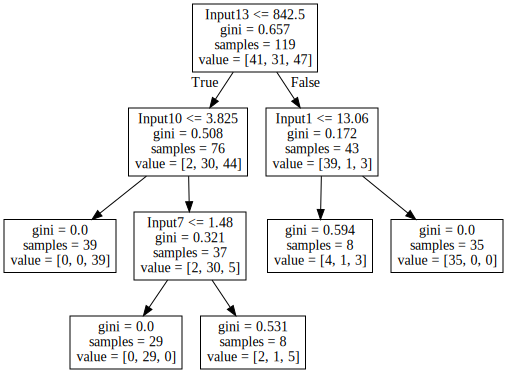

In [16]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(model, out_file=None, feature_names=df.iloc[:, :-1].columns))

Метод ```predict``` позволяет распознать классы для входного списка элементов, представленных в пространстве тех же самых признаков (то есть подаём на вход матрицу).

In [17]:
# Предсказание класса для новых элементов
new_item = [13.1, 1.8, 2.5, 14.6, 133, 2.5, 3.1, 0.3, 2.11, 5.4, 1.1, 3.5, 1050]
model.predict([new_item])

array([0], dtype=int64)

## Оценка качества классификатора

Измерим качество распознавания. <br>
Accuracy (точность) равно доле совпавших ответов в ```y_pred``` и ```y_test```. <br>
Но точность измеряет не то, что надо аналитику, когда в распределении классов имеется смещение (насбалансированные классы).  <br>
Например, если в бинарной классификации отношение классов 0/1 равно 90/10 и если у нас есть классификатор, который всегда распознает 0, то тогда точность такой модели будет равна 0.9, что неоправданно высоко.

Чтобы избежать эти проблемы, надёжнее считать такие показатели как точность и полноту. Сначала построим матрицу ошибок $C = (c_{i,j})$, где $c_{i, j}$ -- количество элементов класса $i$, которым классификатор присвоил класс $j$. Для этого есть функция ```confusion_matrix``` в библиотеке ```sklearn.metrics```.

In [20]:
#  from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,13,0,5
1,0,16,1
2,0,2,22


Тогда по определению
<center>
```
TP (True Positive) = 25
TN (True Negative) = 27
FP (False Positive) = 3
FN (False Negative) = 10
```
</center>

$$
\begin{array}{сс}
Precision = \frac{TP}{TP + FP} &
Recall = \frac{TP}{TP + FN}\\
\end{array}
$$

Физический смысл точности -- доля правильно классифицированных положительных объектов среди всех положительных объектов, _определённых классификатором_. Физический смысл полноты -- доля правильно классифицированных положительных объектов среди всех _истинных положительных объектов_.

Но для полного счастья хочется иметь не два, а одно число, описывающее качество классификатора. Для этого используют функции семейства F-мер. Например, гармоническое среднее:

$$F1 = \frac{2\cdot Precision \cdot Recall}{Precision + Recall}.$$

Но бывает, что точность и полнота важны для качества классификации не в равных степенях. Например, если мы определяем рак по фотоснимкам тканей, то нам гораздо важнее полнота: если классификатор сработает ложно, то в таком случае мы назначим лечение здоровому человеку. А вот если классификатор пропустит у пациента заболевание, то лечение мы не назначим, и это скорее всего приведёт к гораздо более тяжёлым последствиям. Наоборот, если мы классифицируем спам, то нам, вероятно, точность более важна, чем полнота. Если мы пропустим спамное сообщение и пользователь его прочитает, то это всего лишь мелкое недоразумение. А если мы ошибочно посчитаем важное сообщение спамом и удалим его, это уже криминал.

Так вот, для балансировки между точностью и полнотой используется параметр $\beta$:
$$F = (\beta^2 + 1)\frac{Precision \cdot Recall}{\beta^2Precision + Recall}.$$
Если мы отдаём приоритет точности, то нужно выбирать $\beta\in (0, 1)$, если полноте, то $\beta > 1$. При $\beta=1$ получаем определённую выше F1-меру.

Точность, полноту и F1-меру можно посчитать при помощи встроенной функции ```sklearn.metrics.classification_report```.

In [21]:
print(metrics.classification_report(y_pred_test, y_test))

             precision    recall  f1-score   support

          0       0.72      1.00      0.84        13
          1       0.94      0.89      0.91        18
          2       0.92      0.79      0.85        28

avg / total       0.88      0.86      0.87        59



In [18]:
# Активируем поиск на решетке GridSearchCV
from sklearn.model_selection import GridSearchCV



In [19]:
# Инициализируем модель
model_2 = DecisionTreeClassifier(random_state=42,
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=6,
                               max_leaf_nodes=None,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=10,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=8,
                               min_impurity_decrease=0.001,
                               class_weight=None,
                               min_weight_fraction_leaf=0,
                               presort=False,                               
                               splitter='best',
                               max_features = None)

In [26]:
#   Определяем тестируемые значения гиперпараметров
params_set = {
'max_depth': [3, 4, 6],
'min_samples_leaf': [2, 4, 8],
'min_samples_split': [8, 10, 14]
}


#   Проводим 5-fold кросс-валидацию
#   Качество моделей сравниваем с помощью accuracy, так как классы сбалансрованы
grid_CV_1 = GridSearchCV(estimator=model_2,
       param_grid=params_set,
       scoring='accuracy',
       cv=5,
       n_jobs=-1)


#   Обучение на обучающей выборке
grid_CV_1.fit(X_train, y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.001,
                                              min_impurity_split=None,
                                              min_samples_leaf=8,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 6], 'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [8, 10, 14]},
  

In [27]:
#   Лучший набор значений гиперпараметров

best_hyperparams = grid_CV_1.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}


In [28]:
# Значение критерия качества для лучших значений гиперпараметров 
best_CV_score = grid_CV_1.best_score_
print('Лучшее accuracy', best_CV_score)

Лучшее accuracy 0.8823529411764706


In [29]:
# Лучшая модель
best_model = grid_CV_1.best_estimator_

# accuracy на тестовом множестве для лучшей модели
test_acc = best_model.score(X_test,y_test)

# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.864406779661017


Более подробное представление результатов

In [33]:
means = grid_CV_1.cv_results_['mean_test_score']
stds  = grid_CV_1.cv_results_['std_test_score']

In [34]:
means

array([0.87394958, 0.87394958, 0.87394958, 0.88235294, 0.88235294,
       0.88235294, 0.84033613, 0.84033613, 0.84033613, 0.87394958,
       0.87394958, 0.87394958, 0.88235294, 0.88235294, 0.88235294,
       0.84033613, 0.84033613, 0.84033613, 0.87394958, 0.87394958,
       0.87394958, 0.88235294, 0.88235294, 0.88235294, 0.84033613,
       0.84033613, 0.84033613])

In [37]:

for mean, std, params in zip(means, stds, grid_CV_1.cv_results_['params']):
    print("%0.4f (+/-%0.03f) for %r"  % (mean, std * 2, params))
print()

0.8739 (+/-0.111) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.8739 (+/-0.111) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8739 (+/-0.111) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 14}
0.8824 (+/-0.086) for {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.8824 (+/-0.086) for {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.8824 (+/-0.086) for {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 14}
0.8403 (+/-0.113) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 8}
0.8403 (+/-0.113) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.8403 (+/-0.113) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 14}
0.8739 (+/-0.111) for {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.8739 (+/-0.111) for {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8739 (+/-0.111) for {'max_depth': 4, 'min_sam

## Деревья решений для задач регрессии

С помощью деревьев можно решать не только задачу классификации, но и задачу регрессии. То есть когда отклик не дискретный, а непрерывный. Для таких задач реализован класс ```sklearn.tree.DecisionTreeRegressor```, и все шаги по созданию модели точно так же переносятся и на этот класс (даже названия методов одни и те же).

## Случайные леса

Настроим модель случайных лесов для наших данных.

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42,
                               # опции, относящиеся к отдельным деревьям такаие же, как в tree.DecisionTreeClassifier
                               # число деревьев в лесу
                               n_estimators=30,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               max_depth=5,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None,
                               min_samples_split=5
                              )

In [21]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
# Строим предсказание модели
# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

In [23]:
y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.96      1.00      0.98        23

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



Видим, что по f1-скору случайный лес дал прирост в качестве с 0.80 до 0.86 по сравнению с одним решающим деревом.

In [24]:
# from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

,0,1,2
0,18,0,0
1,0,17,0
2,0,1,23


In [25]:
print('Out-of-bag score: {0}'.format(model.oob_score_))

Out-of-bag score: 0.957983193277311


Модель позволяет оценить ценность каждой фичи в смысле её эффективности для разбиения 
(Gini importance). Эта оценка считает для каждой из фич сумму дельт по 
impurity (нормированную), полученных при разбиениях по этой фиче. 
Для этого у модели есть метод feature_importances_.

In [26]:
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
6,Input7,0.197776
9,Input10,0.158428
0,Input1,0.123219
12,Input13,0.108960
10,Input11,0.084667
11,Input12,0.074857
1,Input2,0.071848
5,Input6,0.069017
4,Input5,0.043780
3,Input4,0.032882
